In [ ]:
# INSTALL
pip install pandas numpy matplotlib seaborn scikit-learn jupyter xgboost lightgbm imbalanced-learn joblib

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', 100)

In [3]:
# DATA LOADING
df = pd.read_csv('churn.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


In [4]:
# DATASET OVERVIEW
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Churn Rate: {df['Exited'].mean():.2%} ({df['Exited'].sum()} out of {len(df)} customers)")

# DATA TYPES
print(df.dtypes)

# Display first few rows
df.head()

Shape: 10000 rows, 14 columns
Churn Rate: 20.37% (2037 out of 10000 customers)
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# NULL CHECK
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Not Churned (0): 7,963 customers (79.6%)
Churned (1): 2,037 customers (20.4%)


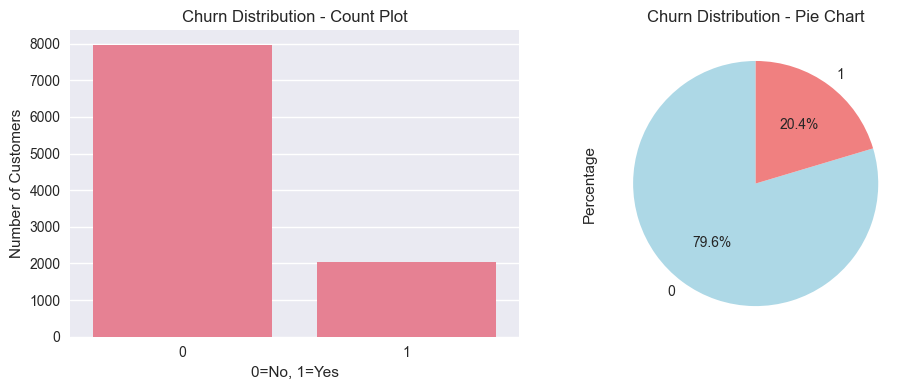

In [6]:
# DATA ANALYSIS
churn_counts = df['Exited'].value_counts()
churn_percentages = df['Exited'].value_counts(normalize=True) * 100

print(f"Not Churned (0): {churn_counts[0]:,} customers ({churn_percentages[0]:.1f}%)")
print(f"Churned (1): {churn_counts[1]:,} customers ({churn_percentages[1]:.1f}%)")

# Visualize 
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Exited')
plt.title('Churn Distribution - Count Plot')
plt.xlabel('0=No, 1=Yes')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
colors = ['lightblue', 'lightcoral']
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Churn Distribution - Pie Chart')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

In [7]:
# BASIC STATISTICAL SUMMARY
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
print(df[numerical_cols].describe())

categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000  

Geography:
Geography
France     5014
Germany

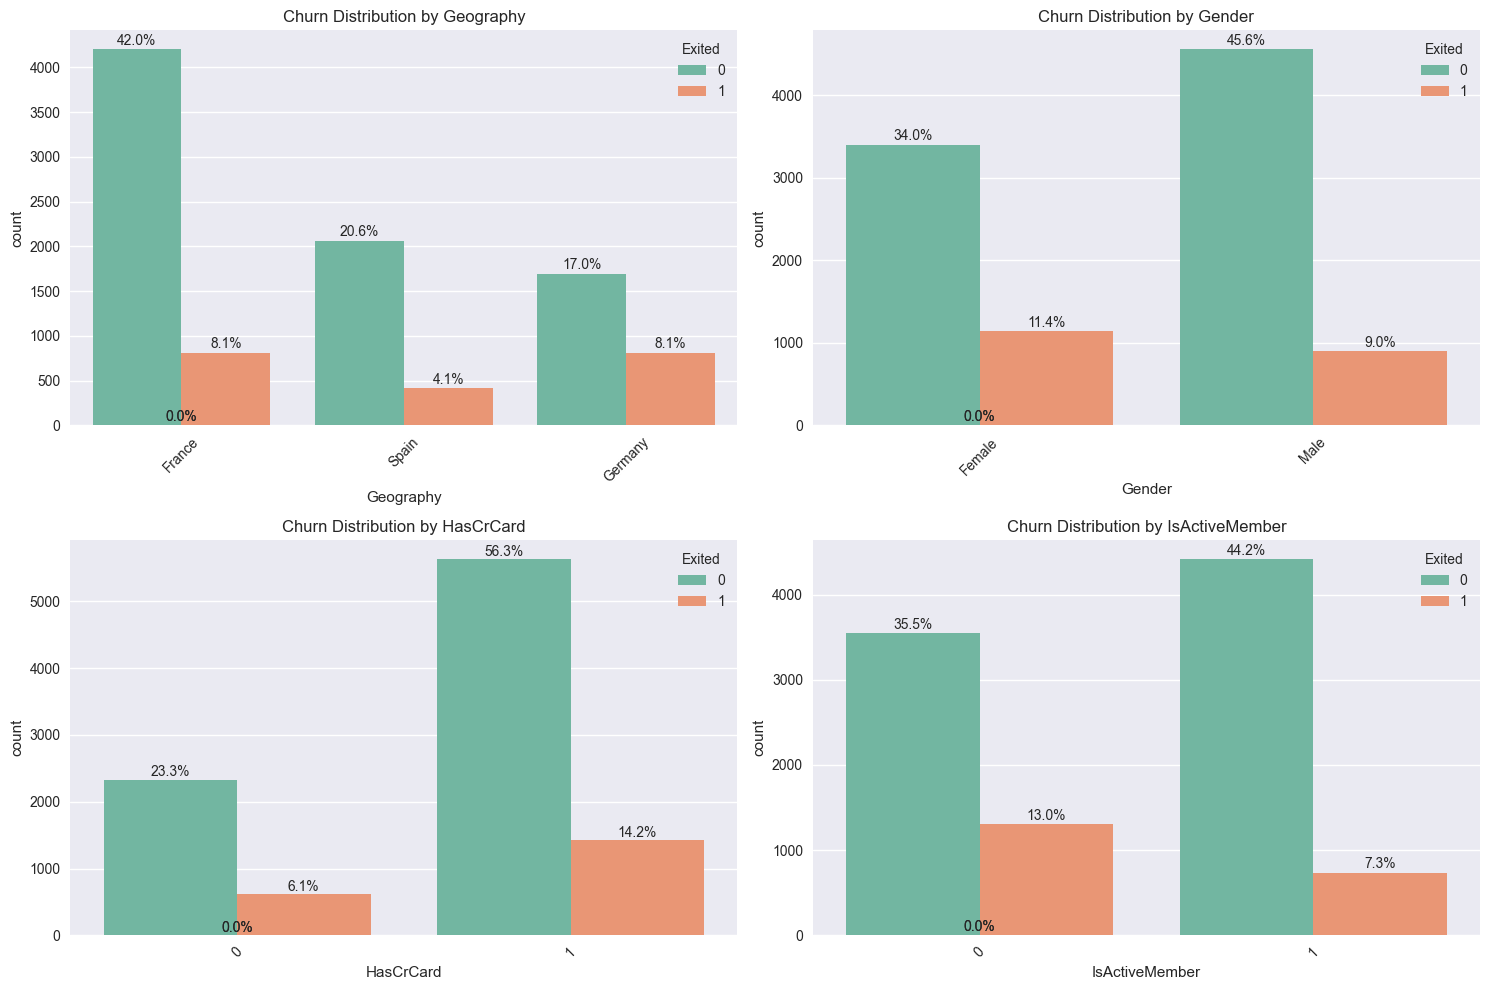

In [8]:
# COUNTPLOTS WITH FEATURES
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    
    # Create countplot with churn breakdown
    sns.countplot(data=df, x=feature, hue='Exited', palette='Set2')
    plt.title(f'Churn Distribution by {feature}')
    plt.xticks(rotation=45)
    
    # percentage annotations
    total = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2., height + 50,
                      f'{height/total*100:.1f}%', ha='center')

plt.tight_layout()
plt.show()

In [9]:
# FEATURE ENGINEERING
df_engineered = df.copy()
print(list(df_engineered.columns))

df_engineered = df_engineered.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
print(list(df_engineered.columns))

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [10]:
# GROUPS 
df_engineered['AgeGroup'] = pd.cut(df_engineered['Age'], 
                                  bins=[0, 30, 40, 50, 60, 100],
                                  labels=['18-30', '31-40', '41-50', '51-60', '60+'])
print(df_engineered['AgeGroup'].value_counts().sort_index())

df_engineered['TenureGroup'] = pd.cut(df_engineered['Tenure'],
                                     bins=[-1, 2, 5, 8, 11],
                                     labels=['0-2', '3-5', '6-8', '9-10'])
print(df_engineered['TenureGroup'].value_counts().sort_index())

df_engineered['CreditScoreGroup'] = pd.cut(df_engineered['CreditScore'],
                                          bins=[0, 600, 700, 850],
                                          labels=['Low', 'Medium', 'High'])
print(df_engineered['CreditScoreGroup'].value_counts().sort_index())

AgeGroup
18-30    1968
31-40    4451
41-50    2320
51-60     797
60+       464
Name: count, dtype: int64
TenureGroup
0-2     2496
3-5     3010
6-8     3020
9-10    1474
Name: count, dtype: int64
CreditScoreGroup
Low       3066
Medium    3818
High      3116
Name: count, dtype: int64


In [11]:
# NEW FEATURES
df_engineered['BalanceToSalaryRatio'] = df_engineered['Balance'] / (df_engineered['EstimatedSalary'] + 1)

df_engineered['ProductsPerYear'] = df_engineered['NumOfProducts'] / (df_engineered['Tenure'] + 1)

df_engineered['ActiveFewProducts'] = ((df_engineered['IsActiveMember'] == 1) & (df_engineered['NumOfProducts'] <= 1)).astype(int)

balance_median = df_engineered['Balance'].median()
df_engineered['HighBalanceInactive'] = ((df_engineered['Balance'] > balance_median) & (df_engineered['IsActiveMember'] == 0)).astype(int)

print(df_engineered[['Balance', 'EstimatedSalary', 'BalanceToSalaryRatio', 'NumOfProducts', 'Tenure', 'ProductsPerYear']].head())

print(f"ActiveFewProducts: {df_engineered['ActiveFewProducts'].sum()} customers")
print(f"HighBalanceInactive: {df_engineered['HighBalanceInactive'].sum()} customers")

     Balance  EstimatedSalary  BalanceToSalaryRatio  NumOfProducts  Tenure  \
0       0.00        101348.88              0.000000              1       2   
1   83807.86        112542.58              0.744670              1       1   
2  159660.80        113931.57              1.401362              3       8   
3       0.00         93826.63              0.000000              2       1   
4  125510.82         79084.10              1.587035              1       2   

   ProductsPerYear  
0         0.333333  
1         0.500000  
2         0.333333  
3         1.000000  
4         0.333333  
ActiveFewProducts: 2563 customers
HighBalanceInactive: 2456 customers


In [12]:
# X & Y SPLIT
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df_engineered['Exited']
X = df_engineered.drop('Exited', axis=1)

print(f"Churn rate: {y.mean():.2%}")

Churn rate: 20.37%


In [13]:
# ONE-HOT ENCODING

categorical_columns = ['Geography', 'Gender', 'AgeGroup', 'TenureGroup', 'CreditScoreGroup']

X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_encoded.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'BalanceToSalaryRatio',
       'ProductsPerYear', 'ActiveFewProducts', 'HighBalanceInactive',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'AgeGroup_31-40',
       'AgeGroup_41-50', 'AgeGroup_51-60', 'AgeGroup_60+', 'TenureGroup_3-5',
       'TenureGroup_6-8', 'TenureGroup_9-10', 'CreditScoreGroup_Medium',
       'CreditScoreGroup_High'],
      dtype='object')

In [14]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# FEATURE SCALING
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature_names = X_encoded.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

print(X_train_scaled_df.iloc[:5, :5].round(3))

   CreditScore    Age  Tenure  Balance  NumOfProducts
0        1.059  1.715   0.685   -1.226         -0.910
1        0.914 -0.660  -0.696    0.413         -0.910
2        1.079 -0.185  -1.732    0.602          0.809
3       -0.929 -0.185  -0.006   -1.226          0.809
4        0.427  0.955   0.339    0.548          0.809


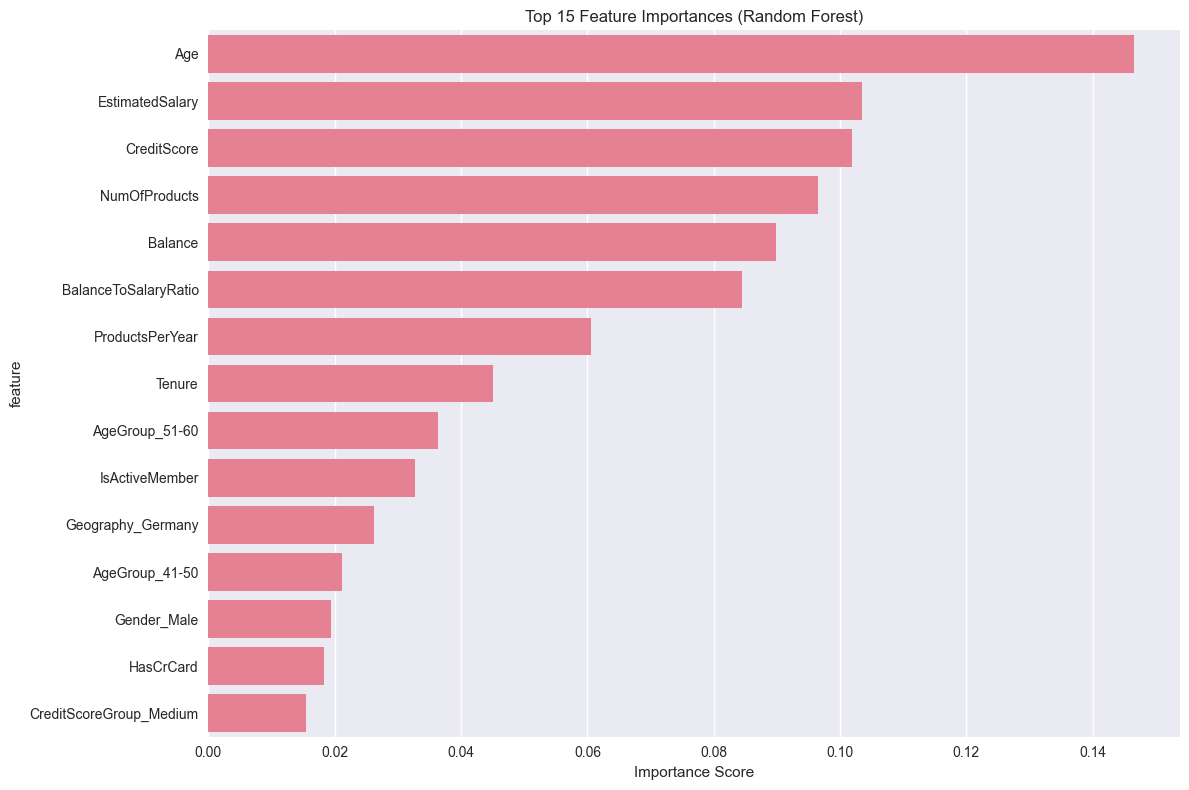

In [16]:
# FEATURE IMPORTANCE ANALYSIS
from sklearn.ensemble import RandomForestClassifier

rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_importance.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [17]:
# FEATURE SELECTION
importance_threshold = 0.005
selected_features = feature_importance[feature_importance['importance'] >= importance_threshold]['feature']

print(f"Selected {len(selected_features)} features with importance >= {importance_threshold}")
print(f"Reduced from {len(feature_names)}")

Selected 24 features with importance >= 0.005
Reduced from 24


In [18]:
# FEATURE CORRELATION CHECK
X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]
correlation_matrix = X_train_selected.corr()

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("Highly correlated pairs (|correlation| > 0.8):")
    for feature1, feature2, corr in high_corr_pairs:
        print(f"  {feature1} - {feature2}: {corr:.3f}")
else:
    print("Nothing")

X_train_final = X_train_selected
X_test_final = X_test_selected

Nothing


In [19]:
# INITIALIZE MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, fbeta_score, roc_auc_score, classification_report)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1)
}

In [20]:
# TRAIN AND EVALUATATION
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    model.fit(X_train_final, y_train)
    
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]
    
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'f2': fbeta_score(y_test, y_pred, beta=2),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'y_pred_proba': y_pred_proba
    }
    
    print(f"F1: {results[name]['f1']:.4f}, Recall: {results[name]['recall']:.4f}")

print("All models trained!")

results_df = pd.DataFrame(results).T.drop(['model', 'y_pred_proba'], axis=1)
results_df = results_df.sort_values('f1', ascending=False)

print(results_df.round(4))

best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']

Training Logistic Regression...
F1: 0.4096, Recall: 0.2948
Training Random Forest...
F1: 0.5638, Recall: 0.4398
Training Gradient Boosting...
F1: 0.6082, Recall: 0.4939
Training XGBoost...
F1: 0.5776, Recall: 0.4939
Training LightGBM...
F1: 0.5956, Recall: 0.4939
All models trained!
                    accuracy precision    recall        f1        f2   roc_auc
Gradient Boosting     0.8705  0.791339  0.493857  0.608169  0.534006  0.869503
LightGBM              0.8635      0.75  0.493857  0.595556  0.530063  0.859999
XGBoost                0.853  0.695502  0.493857  0.577586  0.524257  0.832515
Random Forest         0.8615  0.785088  0.439803   0.56378   0.48222  0.849294
Logistic Regression    0.827  0.670391   0.29484  0.409556  0.332042  0.804577


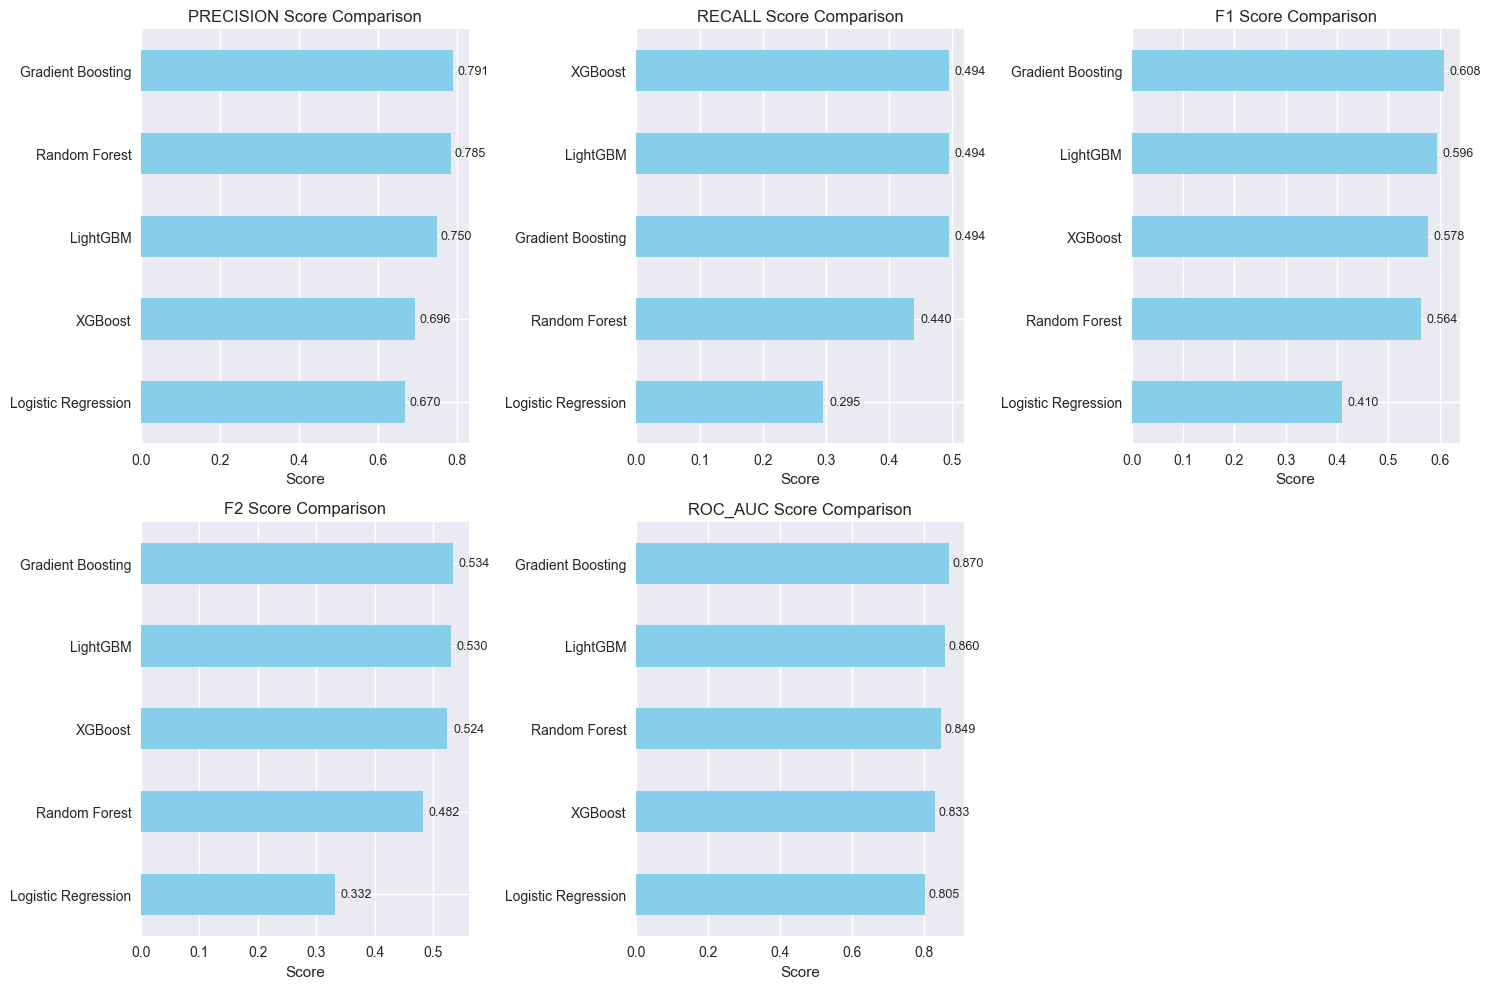

In [21]:
# VISUALIZE MODEL COMPARISON
metrics_to_plot = ['precision', 'recall', 'f1', 'f2', 'roc_auc']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    results_df[metric].sort_values().plot(kind='barh', color='skyblue')
    plt.title(f'{metric.upper()} Score Comparison')
    plt.xlabel('Score')
    
    for j, v in enumerate(results_df[metric].sort_values()):
        plt.text(v + 0.01, j, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Accuracy:  0.8705
Precision: 0.7913
Recall:    0.4939
F1 Score:  0.6082
F2 Score:  0.5340
ROC AUC:   0.8695
 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



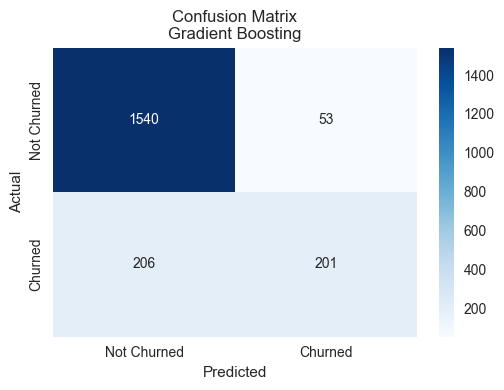

In [22]:
# ANALYSIS OF BEST MODEL
from sklearn.metrics import confusion_matrix

best_metrics = results[best_model_name]
y_pred_best = best_model.predict(X_test_final)

print(f"Accuracy:  {best_metrics['accuracy']:.4f}")
print(f"Precision: {best_metrics['precision']:.4f}")
print(f"Recall:    {best_metrics['recall']:.4f}")
print(f"F1 Score:  {best_metrics['f1']:.4f}")
print(f"F2 Score:  {best_metrics['f2']:.4f}")
print(f"ROC AUC:   {best_metrics['roc_auc']:.4f}")

print(" Classification Report:")
print(classification_report(y_test, y_pred_best))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title(f'Confusion Matrix\n{best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

In [23]:
# THRESHOLD OPTIMIZATION
from sklearn.metrics import precision_recall_curve

def find_optimal_thresholds(y_true, y_pred_proba):
    thresholds = np.linspace(0.1, 0.9, 50)
    f1_scores = []
    f2_scores = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        f1_scores.append(f1_score(y_true, y_pred))
        f2_scores.append(fbeta_score(y_true, y_pred, beta=2))
    
    best_f1_threshold = thresholds[np.argmax(f1_scores)]
    best_f2_threshold = thresholds[np.argmax(f2_scores)]
    
    return best_f1_threshold, best_f2_threshold

y_pred_proba_best = results[best_model_name]['y_pred_proba']

f1_threshold, f2_threshold = find_optimal_thresholds(y_test, y_pred_proba_best)

print(f"Optimal F1 threshold:  {f1_threshold:.3f}")
print(f"Optimal F2 threshold:  {f2_threshold:.3f}")
print(f"Default threshold:     0.500")

def evaluate_threshold(threshold, y_true, y_pred_proba, label):
    y_pred = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    
    print(f"\n{label}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  F2 Score:  {f2:.4f}")
    
    return precision, recall, f1, f2

print(f"\n{best_model_name} Performance with Different Thresholds:")
evaluate_threshold(0.5, y_test, y_pred_proba_best, "Default (0.5)")
evaluate_threshold(f1_threshold, y_test, y_pred_proba_best, f"F1-Optimized ({f1_threshold:.3f})")
evaluate_threshold(f2_threshold, y_test, y_pred_proba_best, f"F2-Optimized ({f2_threshold:.3f})")

Optimal F1 threshold:  0.280
Optimal F2 threshold:  0.149
Default threshold:     0.500

Gradient Boosting Performance with Different Thresholds:

Default (0.5):
  Precision: 0.7913
  Recall:    0.4939
  F1 Score:  0.6082
  F2 Score:  0.5340

F1-Optimized (0.280):
  Precision: 0.6135
  Recall:    0.6708
  F1 Score:  0.6408
  F2 Score:  0.6585

F2-Optimized (0.149):
  Precision: 0.4295
  Recall:    0.8378
  F1 Score:  0.5679
  F2 Score:  0.7040


(0.42947103274559195,
 0.8378378378378378,
 0.5678601165695254,
 0.7039636663914121)

In [24]:
# TUNING
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

In [27]:
# SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)

print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE:  {np.bincount(y_train_smote)}")

print(f"\nTraining {best_model_name} with SMOTE...")
best_model_smote = GradientBoostingClassifier(random_state=42)
best_model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = best_model_smote.predict(X_test_final)
y_pred_proba_smote = best_model_smote.predict_proba(X_test_final)[:, 1]

smote_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_smote),
    'precision': precision_score(y_test, y_pred_smote),
    'recall': recall_score(y_test, y_pred_smote),
    'f1': f1_score(y_test, y_pred_smote),
    'f2': fbeta_score(y_test, y_pred_smote, beta=2),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_smote)
}

print("\nSMOTE vs Original Comparison:")
print("Metric     | Original| SMOTE  | Change")
for metric in ['precision', 'recall', 'f1', 'f2']:
    original_val = results[best_model_name][metric]
    smote_val = smote_metrics[metric]
    change = smote_val - original_val
    print(f"{metric:10} | {original_val:.4f}  | {smote_val:.4f} | {change:+.4f}")

Before SMOTE: [6370 1630]
After SMOTE:  [6370 6370]

Training Gradient Boosting with SMOTE...

SMOTE vs Original Comparison:
Metric     | Original| SMOTE  | Change
precision  | 0.7913  | 0.6521 | -0.1393
recall     | 0.4939  | 0.6216 | +0.1278
f1         | 0.6082  | 0.6365 | +0.0283
f2         | 0.5340  | 0.6275 | +0.0935


In [28]:
# HYPERPARAMETER TUNING
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Performing GridSearchCV for Gradient Boosting.")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_final, y_train)

print(f"\nTuning completed!")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1: {grid_search.best_score_:.4f}")

tuned_model = grid_search.best_estimator_

Performing GridSearchCV for Gradient Boosting.
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Tuning completed!
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation F1: 0.5952


In [30]:
# EVALUATE TUNED
y_pred_tuned = tuned_model.predict(X_test_final)
y_pred_proba_tuned = tuned_model.predict_proba(X_test_final)[:, 1]

tuned_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_tuned),
    'precision': precision_score(y_test, y_pred_tuned),
    'recall': recall_score(y_test, y_pred_tuned),
    'f1': f1_score(y_test, y_pred_tuned),
    'f2': fbeta_score(y_test, y_pred_tuned, beta=2),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_tuned)
}

print("Tuned Model Performance:")
print("Metric     | Original | Tuned    | Change")
print("-----------|----------|----------|---------")
for metric in ['precision', 'recall', 'f1', 'f2', 'roc_auc']:
    original_val = results[best_model_name][metric]
    tuned_val = tuned_metrics[metric]
    change = tuned_val - original_val
    print(f"{metric:10} | {original_val:.4f}   | {tuned_val:.4f}   | {change:+.4f}")

Tuned Model Performance:
Metric     | Original | Tuned    | Change
-----------|----------|----------|---------
precision  | 0.7913   | 0.7444   | -0.0469
recall     | 0.4939   | 0.4939   | +0.0000
f1         | 0.6082   | 0.5938   | -0.0144
f2         | 0.5340   | 0.5295   | -0.0045
roc_auc    | 0.8695   | 0.8653   | -0.0043


                                                        model accuracy  \
Original    ([DecisionTreeRegressor(criterion='friedman_ms...   0.8705   
With SMOTE                                                NaN   0.8555   
Tuned                                                     NaN   0.8625   

           precision    recall        f1        f2   roc_auc  \
Original    0.791339  0.493857  0.608169  0.534006  0.869503   
With SMOTE  0.652062  0.621622  0.636478   0.62748  0.867485   
Tuned       0.744444  0.493857  0.593796  0.529505  0.865252   

                                                 y_pred_proba  
Original    [0.02515550555169581, 0.08739880554289264, 0.0...  
With SMOTE                                                NaN  
Tuned                                                     NaN  


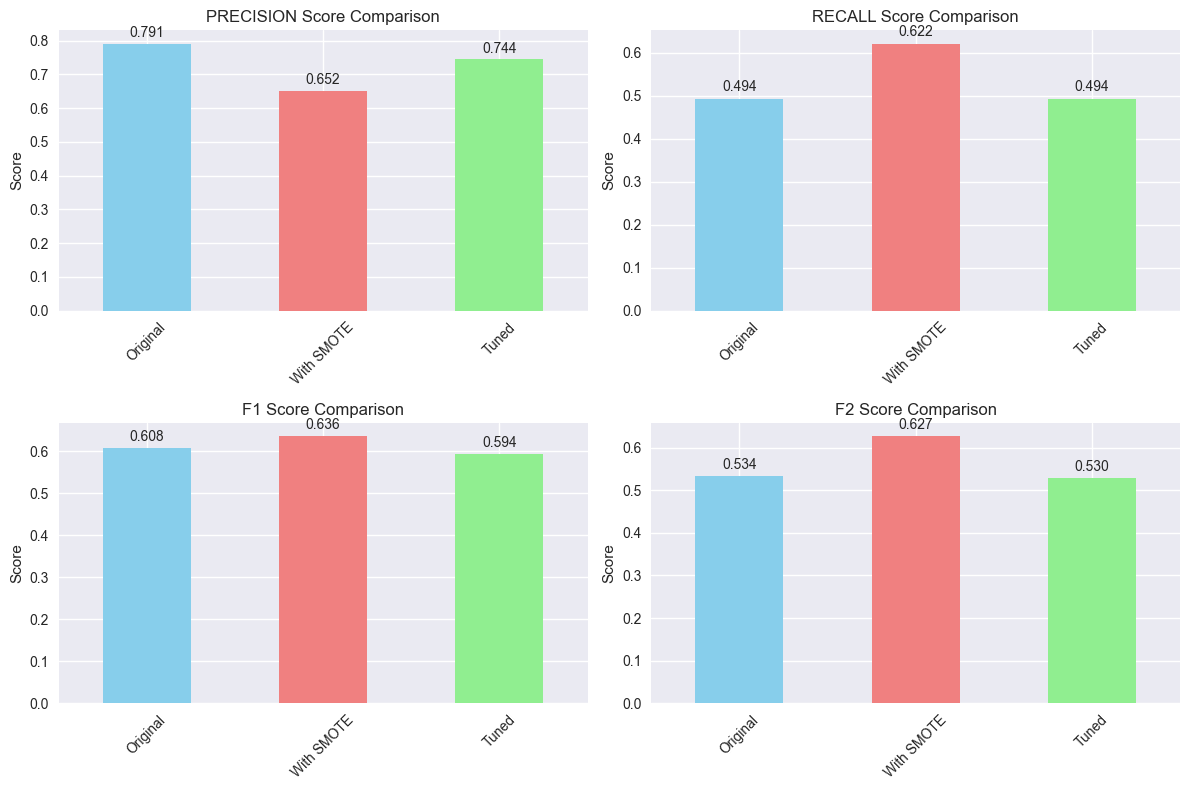

In [31]:
# MODEL COMPARISON
comparison_data = {
    'Original': results[best_model_name],
    'With SMOTE': smote_metrics,
    'Tuned': tuned_metrics
}

comparison_df = pd.DataFrame(comparison_data).T
comparison_df = comparison_df.drop(['model', 'y_pred_proba'], errors='ignore')

print(comparison_df.round(4))

metrics_to_compare = ['precision', 'recall', 'f1', 'f2']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics_to_compare, 1):
    plt.subplot(2, 2, i)
    comparison_df[metric].plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title(f'{metric.upper()} Score Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    
    for j, v in enumerate(comparison_df[metric]):
        plt.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
# THRESHOLD OPTIMIZATION FOR SMOTE MODEL
y_pred_proba_smote = best_model_smote.predict_proba(X_test_final)[:, 1]

f1_threshold_smote, f2_threshold_smote = find_optimal_thresholds(y_test, y_pred_proba_smote)

print(f"F1 threshold for SMOTE:  {f1_threshold_smote:.3f}")
print(f"F2 threshold for SMOTE:  {f2_threshold_smote:.3f}")

print(f"\nSMOTE Model Performance with Different Thresholds:")
evaluate_threshold(0.5, y_test, y_pred_proba_smote, "Default (0.5)")
evaluate_threshold(f1_threshold_smote, y_test, y_pred_proba_smote, f"F1-Optimized ({f1_threshold_smote:.3f})")
evaluate_threshold(f2_threshold_smote, y_test, y_pred_proba_smote, f"F2-Optimized ({f2_threshold_smote:.3f})")

F1 threshold for SMOTE:  0.476
F2 threshold for SMOTE:  0.312

SMOTE Model Performance with Different Thresholds:

Default (0.5):
  Precision: 0.6521
  Recall:    0.6216
  F1 Score:  0.6365
  F2 Score:  0.6275

F1-Optimized (0.476):
  Precision: 0.6311
  Recall:    0.6388
  F1 Score:  0.6349
  F2 Score:  0.6373

F2-Optimized (0.312):
  Precision: 0.4879
  Recall:    0.7936
  F1 Score:  0.6043
  F2 Score:  0.7052


(0.4879154078549849,
 0.7936117936117936,
 0.6043030869971936,
 0.7052401746724891)

ALL THRESHOLD PERFORMANCE:
                    precision    recall        f1        f2 model_type
Without SMOTE - 0.5  0.791339  0.493857  0.608169  0.534006     normal
Without SMOTE - F1   0.640394  0.638821  0.639606  0.639135     normal
Without SMOTE - F2   0.429471  0.837838   0.56786  0.703964     normal
With SMOTE - 0.5     0.652062  0.621622  0.636478   0.62748      smote
With SMOTE - F1      0.632603  0.638821  0.635697  0.637567      smote
With SMOTE - F2      0.486446  0.793612  0.603175  0.704625      smote

BEST SCORES:
  • Best F1 Score: Without SMOTE - F1 (F1: 0.6396)
  • Best F2 Score: With SMOTE - F2 (F2: 0.7046)
  • Best Precision: Without SMOTE - 0.5 (Precision: 0.7913)
  • Best Recall: Without SMOTE - F2 (Recall: 0.8378)


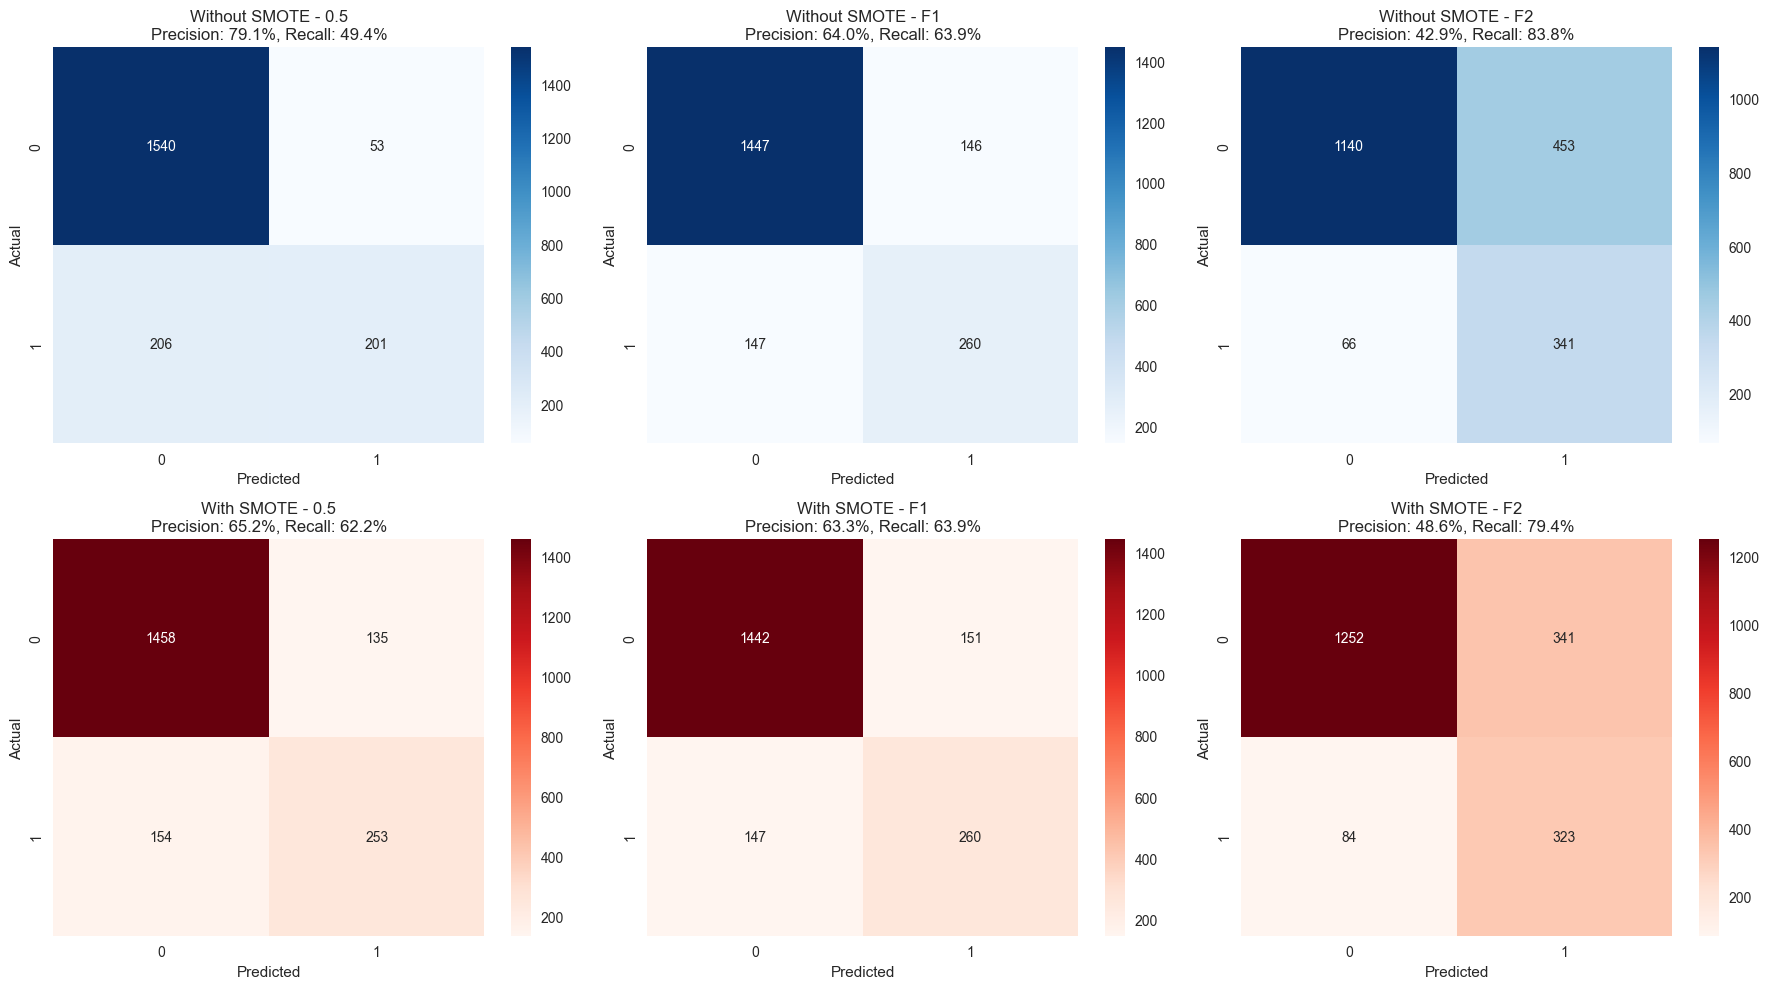

In [36]:
# FINAL SUMMARY
normal_model = results['Gradient Boosting']['model']
smote_model = best_model_smote

y_pred_proba_normal = results['Gradient Boosting']['y_pred_proba']
y_pred_proba_smote = best_model_smote.predict_proba(X_test_final)[:, 1]

thresholds_normal = {'0.5': 0.5, 'F1': 0.312, 'F2': 0.149}
thresholds_smote = {'0.5': 0.5, 'F1':0.476, 'F2': 0.312}

all_scenarios = {}

for name, threshold in thresholds_normal.items():
    y_pred = (y_pred_proba_normal >= threshold).astype(int)
    all_scenarios[f'Without SMOTE - {name}'] = {
        'model_type': 'normal',
        'threshold': threshold,
        'threshold_name': name,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'f2': fbeta_score(y_test, y_pred, beta=2),
        'predictions': y_pred,
        'probabilities': y_pred_proba_normal
    }

for name, threshold in thresholds_smote.items():
    y_pred = (y_pred_proba_smote >= threshold).astype(int)
    all_scenarios[f'With SMOTE - {name}'] = {
        'model_type': 'smote', 
        'threshold': threshold,
        'threshold_name': name,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'f2': fbeta_score(y_test, y_pred, beta=2),
        'predictions': y_pred,
        'probabilities': y_pred_proba_smote
    }

scenario_df = pd.DataFrame(all_scenarios).T
scenario_df = scenario_df[['precision', 'recall', 'f1', 'f2', 'model_type']]

print("ALL THRESHOLD PERFORMANCE:")
print(scenario_df.round(4))

best_f1 = scenario_df['f1'].idxmax()
best_f2 = scenario_df['f2'].idxmax() 
best_precision = scenario_df['precision'].idxmax()
best_recall = scenario_df['recall'].idxmax()

print(f"\nBEST SCORES:")
print(f"  • Best F1 Score: {best_f1} (F1: {scenario_df.loc[best_f1]['f1']:.4f})")
print(f"  • Best F2 Score: {best_f2} (F2: {scenario_df.loc[best_f2]['f2']:.4f})")
print(f"  • Best Precision: {best_precision} (Precision: {scenario_df.loc[best_precision]['precision']:.4f})")
print(f"  • Best Recall: {best_recall} (Recall: {scenario_df.loc[best_recall]['recall']:.4f})")

plt.figure(figsize=(18, 10))

for i, (name, threshold) in enumerate(thresholds_normal.items()):
    plt.subplot(2, 3, i+1)
    y_pred = (y_pred_proba_normal >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Without SMOTE - {name}\nPrecision: {precision_score(y_test, y_pred):.1%}, Recall: {recall_score(y_test, y_pred):.1%}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

for i, (name, threshold) in enumerate(thresholds_smote.items()):
    plt.subplot(2, 3, i+4)
    y_pred = (y_pred_proba_smote >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'With SMOTE - {name}\nPrecision: {precision_score(y_test, y_pred):.1%}, Recall: {recall_score(y_test, y_pred):.1%}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

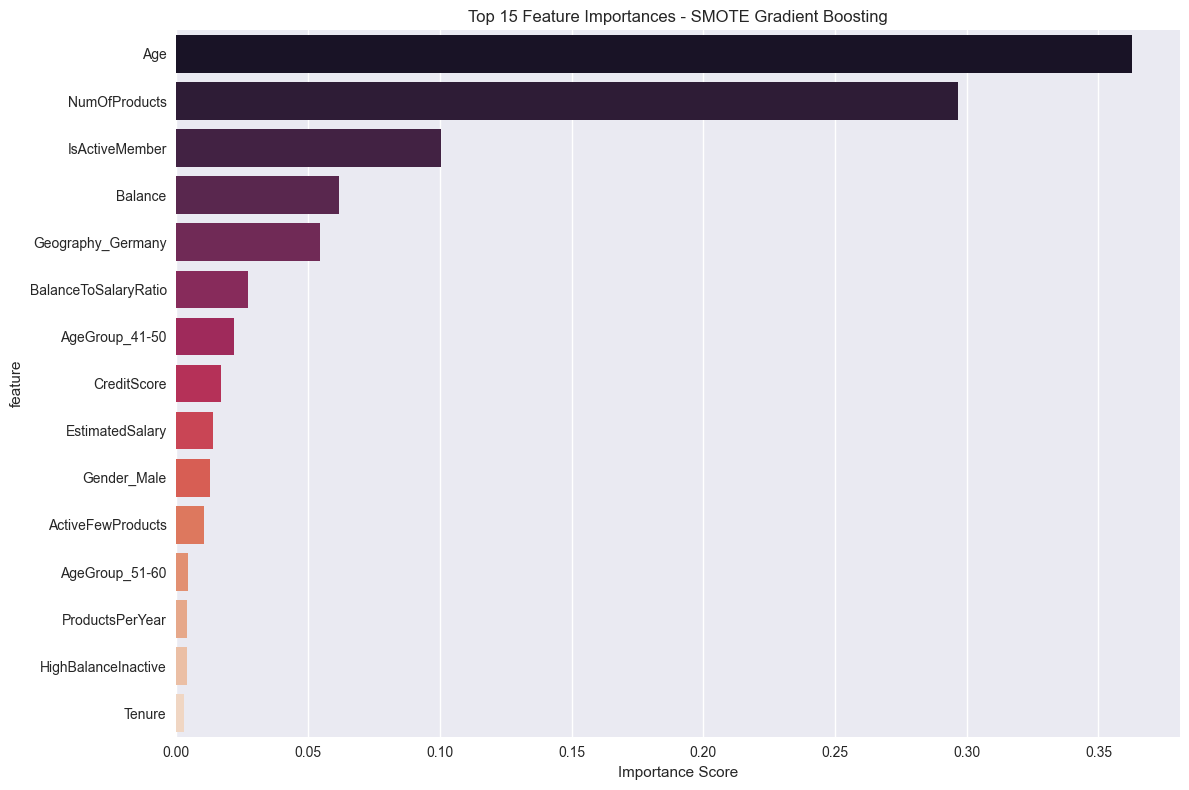

In [35]:
# FEATURE IMPORTANCE
features_to_keep = selected_features
final_importance = pd.DataFrame({
    'feature': features_to_keep,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = final_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='rocket')
plt.title('Top 15 Feature Importances - SMOTE Gradient Boosting')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [49]:
# DOWNLOAD MODEL
import joblib

best_model = results['Gradient Boosting']['model']
optimal_threshold = 0.280

y_pred_optimal = (results['Gradient Boosting']['y_pred_proba'] >= optimal_threshold).astype(int)

performance_metrics = {
    'f1_score': f1_score(y_test, y_pred_optimal),
    'precision': precision_score(y_test, y_pred_optimal),
    'recall': recall_score(y_test, y_pred_optimal),
    'roc_auc': roc_auc_score(y_test, results['Gradient Boosting']['y_pred_proba'])
}

print("Performance at F1 optimized threshold (0.280):")
print(f"  F1 Score: {performance_metrics['f1_score']:.4f}")
print(f"  Precision: {performance_metrics['precision']:.4f}")
print(f"  Recall: {performance_metrics['recall']:.4f}")

model_package = {
    'model': best_model,
    'f1_optimized_threshold': optimal_threshold,
    'feature_names': features_to_keep,
    'scaler': scaler,
    'performance_metrics': performance_metrics,
    'risk_thresholds': {
        'low_risk_max': 0.3,
        'medium_risk_max': 0.6,  
        'high_risk_min': 0.6
    },
    'model_info': {
        'model_type': 'Gradient Boosting',
        'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
        'dataset_info': f'{df.shape[0]} samples, {len(features_to_keep)} features',
        'churn_rate': f'{y.mean():.2%}'
    }
}

joblib.dump(model_package, 'churn_risk_model.pkl')
print("Model package saved as 'churn_risk_model.pkl'")

CREATING DEPLOYMENT-READY MODEL PACKAGE
Performance at F1 optimized threshold (0.280):
  F1 Score: 0.6408
  Precision: 0.6135
  Recall: 0.6708
Model package saved as 'churn_risk_model.pkl'
